In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv('listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,274.0,2,702,2025-02-24,3.60,1,325,32,NaN
1,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,NaN,1,299,2024-06-09,1.65,1,0,4,NaN
2,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24885,-97.73587,Entire home/apt,189.0,30,122,2024-10-01,0.66,1,0,2,NaN
3,6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,NaN,78704,30.26034,-97.76487,Entire home/apt,240.0,3,334,2025-02-17,2.03,1,171,21,NaN
4,8502,Woodland Studio Lodging,25298,Karen,NaN,78741,30.23466,-97.73682,Entire home/apt,NaN,4,53,2024-04-14,0.29,1,13,2,NaN


In [101]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
15426,1369030977278306490,Flex basic,663332247,Natnael,NaN,78705,30.292779,-97.725420,Private room,23.0,30,0,NaN,NaN,14,347,0,NaN
15427,1369031004106068720,Stylish & Lux Stay | Walk to Top Eats & Pickle...,19137768,Kristen,NaN,78722,30.286520,-97.712380,Entire home/apt,312.0,2,0,NaN,NaN,2,4,0,NaN
15428,1369057136333994471,Hill Country Hideout-Pool-HotTub,68569490,Evan & Lala,NaN,78737,30.224096,-98.008301,Entire home/apt,444.0,2,1,2025-03-10,1.0,1,339,1,NaN
15429,1369090281815642314,Vibrant East Austin Retreat Private 2 Bedroom ...,142909764,The,NaN,78721,30.255941,-97.685958,Entire home/apt,116.0,1,0,NaN,NaN,7,61,0,NaN
15430,1369133036341359961,"Hot Tub & Pool, Stunning 4BD Near Domain & Cap...",56352966,Krishni,NaN,78753,30.356580,-97.697823,Entire home/apt,242.0,1,1,2025-03-06,1.0,1,365,1,NaN


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15431 entries, 0 to 15430
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15431 non-null  int64  
 1   name                            15431 non-null  object 
 2   host_id                         15431 non-null  int64  
 3   host_name                       15410 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   15431 non-null  int64  
 6   latitude                        15431 non-null  float64
 7   longitude                       15431 non-null  float64
 8   room_type                       15431 non-null  object 
 9   price                           11029 non-null  float64
 10  minimum_nights                  15431 non-null  int64  
 11  number_of_reviews               15431 non-null  int64  
 12  last_review                     

In [61]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            21
neighbourhood_group               15431
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              4402
minimum_nights                        0
number_of_reviews                     0
last_review                        3037
reviews_per_month                  3037
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           15431
dtype: int64

# Drop Coloumns 

In [77]:
df= df.dropna(thresh=len(df)*0.5,axis=1)

# Fill numerical missing values with median

In [80]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical missing with 'Unknown

In [85]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna('Unknown')

# clean price

In [92]:
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)


# Handle 0 bedrooms to avoid division by zero

In [105]:
df['room_type'] = df['room_type'].replace(0, 1)

In [114]:
print(df.columns.tolist())


['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']


In [116]:
print(df.select_dtypes(include=['int64', 'float64']).columns.tolist())


['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']


# Create new feature

In [118]:
df['price_per_available_day'] = df['price'] / df['availability_365'].replace(0, 1)


In [120]:
df['price_per_review'] = df['price'] / df['number_of_reviews'].replace(0, 1)


In [122]:
df.groupby('room_type')['price'].mean()


room_type
Entire home/apt    372.060616
Hotel room         503.789916
Private room       149.300469
Shared room        128.984615
Name: price, dtype: float64

# Visualization

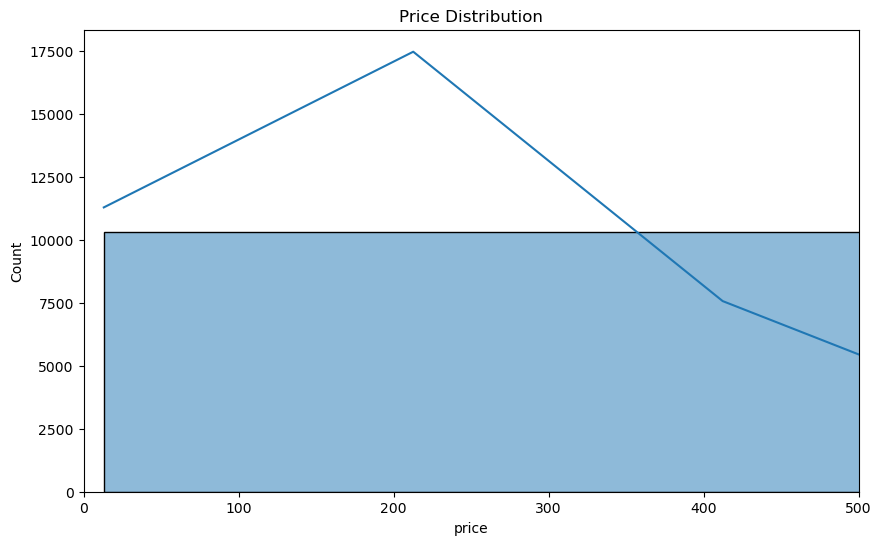

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlim(0, 500)  # focus on prices under $500
plt.show()


# Price Availability

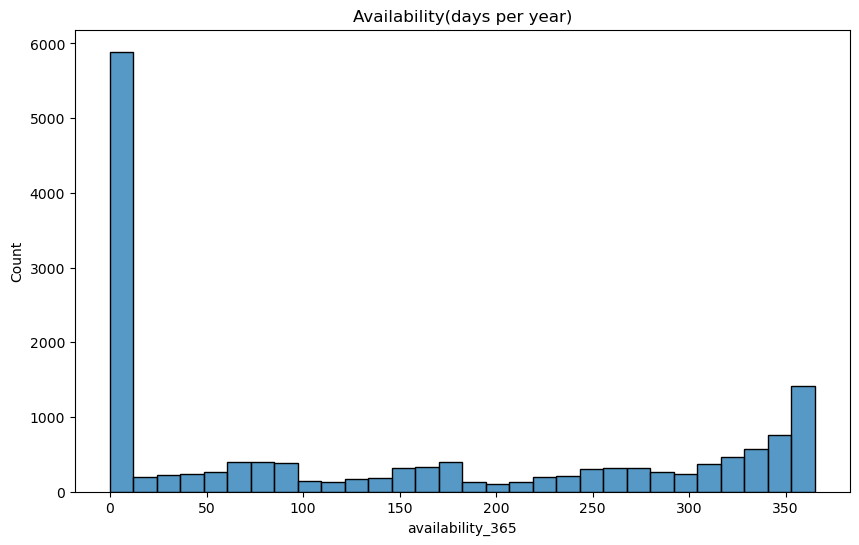

In [130]:
plt.figure(figsize=(10,6))
sns.histplot(df['availability_365'], bins = 30,kde= False)
plt.title('Availability(days per year)')
plt.show()

## Top 10 Neighborhoods by Listing Count

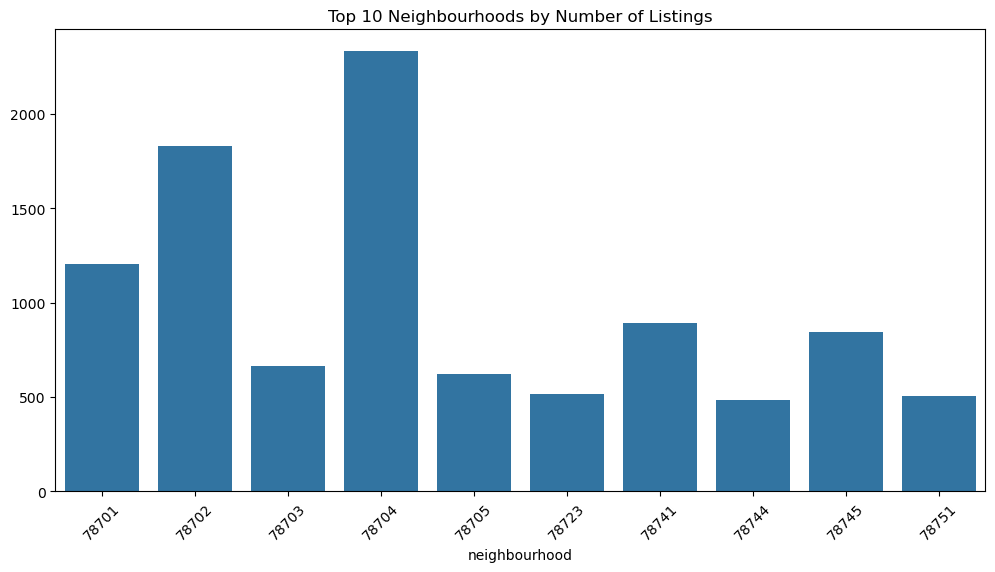

In [135]:
top_neighborhoods = df['neighbourhood'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values)
plt.xticks(rotation=45)
plt.title('Top 10 Neighbourhoods by Number of Listings')
plt.show()


In [139]:
df['price'].median()

189.0

In [141]:
df['neighbourhood'].value_counts().head(3)

neighbourhood
78704    2330
78702    1828
78701    1206
Name: count, dtype: int64

In [143]:
(df['availability_365'] > 300).mean() * 100

23.64720368090208

## Key Findings
1. Median price of listings is around $189.0.

#
2. Top 3 neighborhoods with the most listings are 78704, 78702, and 78701.

#
3. 23.64% of listings are available more than 300 days a year.

#
4. Price distribution is right-skewed, with most listings under $200.

#
5. Most hosts have only 1 listing; few hosts manage more than 10 listings.

#
6. Minimum nights mostly range between 1 and 3 nights.

#
7. Listings with more reviews tend to have higher availability.